In [1]:
#Let's start by importing the required libraries
!pip install strawberryfields
import numpy as np
import strawberryfields as sf

(array([4.06960e+04, 2.24345e+05, 3.50727e+05, 2.50902e+05, 1.01366e+05,
        2.63320e+04, 4.91000e+03, 6.53000e+02, 6.30000e+01, 6.00000e+00]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

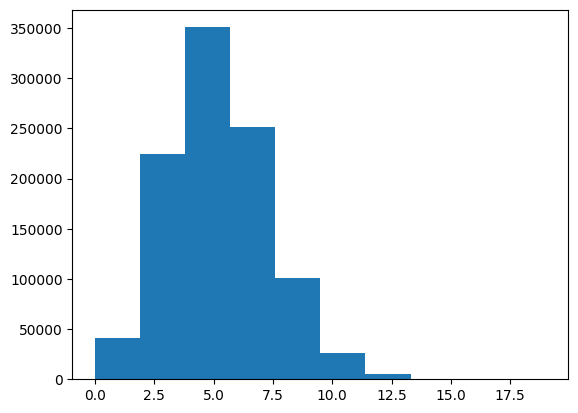

In [19]:
#Let's model a Poisson Point Process with a mean of 0.5
mean = 5
#Let's generate 100 samples from this Poisson Point Process
samples = np.random.poisson(mean, 1000000)
#Lets create a histogram of the samples
import matplotlib.pyplot as plt
plt.hist(samples)

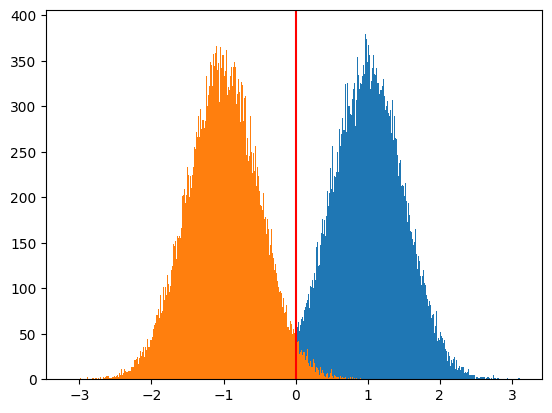

In [29]:
#Let's plot the samples for a homodyne detection
#Let's define the mean and variance of the Gaussian
mu1 = 1
var1 = 1/2
#Let's generate 100 samples from this Gaussian
samples1 = np.random.normal(mu1, var1, 100000)
#Let's plot the samples
#plt.hist(samples1,1000)

#Let's plot samples for homodyne detection of another gaussian and compare the two
#Let's define the mean and variance of the Gaussian
mu2 = -1
var2 = 1/2
#Let's generate 100 samples from this Gaussian
samples2 = np.random.normal(mu2, var2, 100000)
#Let's plot the samples
#plt.hist(samples2,1000)

#Plot both the gaussians together
plt.hist(samples1,1000)
plt.hist(samples2,1000)
#Draw a line at x=0
plt.axvline(x=0, color='red')


In [57]:
#Now let's model homodyne in Strawberry Fields

#This is the main function that we will use to generate samples
def BPSK_Sample_Homodyne(alpha):
    #Let's define the Strawberry Fields program, we will only use a single mode
    prog = sf.Program(1)
    #Let's define the Strawberry Fields engine, we will use the Gaussian backend
    eng = sf.Engine('gaussian')

    #The circuit will place a coherent state with complex amplitude alpha into mode 0, then measure homodyne
    with prog.context as q:
        sf.ops.Coherent(alpha)| q[0]
        sf.ops.MeasureHomodyne(0) | q[0]

    #Let's run the circuit
    result = eng.run(prog)
    #let's return the samples
    return result.samples[0]

1.3266028314750153


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   2.,
          0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   2.,   2.,   0.,   3.,   1.,   1.,   2.,   1.,   2.,   1.,
          0.,   2.,   1.,   3.,   1.,   2.,   1.,   0.,   2.,   0.,   0.,
          2.,   1.,   1.,   0.,   0.,   4.,   3.,   5.,   1.,   0.,   1.,
          6.,   3.,   2.,   2.,   1., 

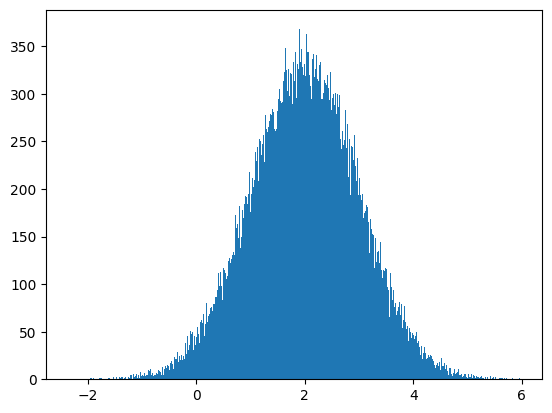

In [59]:
#Now let's run it many times
print(BPSK_Sample_Homodyne(1)[0])

sample_count=100000

samples = np.zeros(sample_count)
for i in range(sample_count):
    samples[i]=BPSK_Sample_Homodyne(1)[0]

#Let's plot the samples
plt.hist(samples,1000)